# Task 2
分析大家的短评用词，分析 总体/分词性 的核心词，通过可视化方式展示

In [1]:
import jieba 
import pandas as pd

In [2]:
# 按需要读入comment，将其转为list
text = pd.read_csv('.data/cmt_data1.csv', usecols=['comment'], lineterminator='\n').T.values.tolist()[0]

In [3]:
#text[:1000]

In [4]:
# 将list转为str
textStr = ''.join(str(x) for x in text)

In [5]:
#textStr[:1000]

In [6]:
# 分词
mytext = " ".join(jieba.cut(textStr))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.988 seconds.
Prefix dict has been built succesfully.


In [7]:
#print(mytext[:1000])

In [8]:
# 停用词list
stop_words = []
with open('stopwords.txt', 'r', errors='ignore') as f:        
        for line in f.readlines():
            stop_words.append(line.strip())
# 从分词结果过滤掉停用词
substantial_words = []
for word in list(mytext):
    if not word in stop_words:
        substantial_words.append(word)

In [9]:
# 将结果list转为str
newtext = ''.join(substantial_words)

In [10]:
# 分析总体词频
jieba.suggest_freq('好莱坞', True)
from jieba import analyse
key_words = jieba.analyse.extract_tags(newtext, topK=500, withWeight=True)
import pandas as pd
df = pd.DataFrame(key_words, columns=['word','weight'])
df

,word,weight
0,电影,0.173136
1,片子,0.056990
2,喜欢,0.049454
3,时候,0.037396
4,影片,0.033547
5,剧情,0.031451
6,结局,0.028478
7,导演,0.028173
8,宫崎骏,0.026679
9,感动,0.025855


In [12]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
# 用电影相关图片作为词云形状
movie_mask = np.array(Image.open('movie-projector-icon.jpg'))
# 设置参数
wc = WordCloud(font_path='simhei.ttf',
               max_words=2000,
               width=1920,
               height=1080,
               mask=movie_mask,
               background_color="white",
               margin=5)


(-0.5, 2265.5, 1661.5, -0.5)

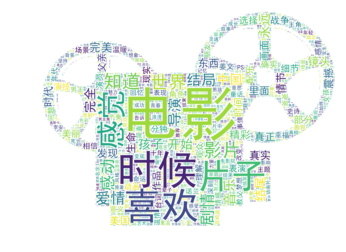

In [13]:
# 生成词云
wc.generate(newtext)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [14]:
# 保存到本地
wc.to_file('./pic/douban250movieAll.png')

In [15]:
# 分析名词词频
jieba.suggest_freq('好莱坞', True)
n_key_words = jieba.analyse.extract_tags(newtext, topK=200, withWeight=True, allowPOS=('n') )
df = pd.DataFrame(n_key_words, columns=['word','weight'])
df

,word,weight
0,电影,0.409346
1,片子,0.134742
2,时候,0.088415
3,影片,0.079315
4,剧情,0.074360
5,结局,0.067330
6,爱情,0.058998
7,感觉,0.058388
8,世界,0.053889
9,结尾,0.050570


(-0.5, 2265.5, 1661.5, -0.5)

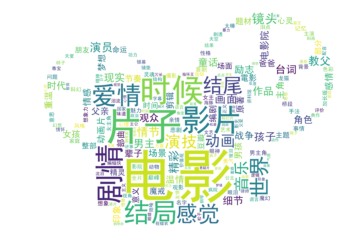

In [29]:
# 生成词云

wc.generate_from_frequencies(dict(n_key_words))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [31]:
# 保存到本地
wc.to_file('./pic/douban250movieN.png')

(-0.5, 2265.5, 1661.5, -0.5)

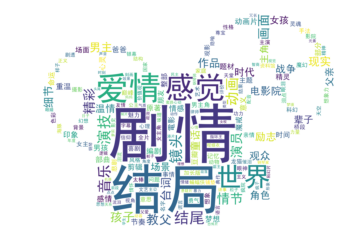

In [33]:
# 前4名高频词无实质内容,去掉再生成一个

wc.generate_from_frequencies(dict(n_key_words[4:]))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [34]:
wc.to_file('./pic/douban250movieN2.png')

In [18]:
v_key_words = jieba.analyse.extract_tags(newtext, topK=200, withWeight=True, allowPOS=('v') )
df = pd.DataFrame(v_key_words, columns=['word','weight'])
df

,word,weight
0,喜欢,0.248952
1,导演,0.141823
2,感动,0.130155
3,知道,0.095398
4,震撼,0.083600
5,表演,0.064078
6,开始,0.053660
7,叙事,0.053094
8,回忆,0.046526
9,发现,0.044076


(-0.5, 2265.5, 1661.5, -0.5)

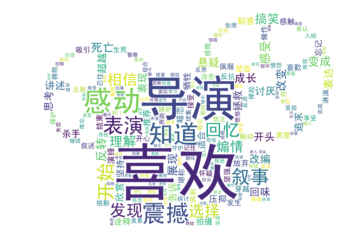

In [19]:
wc.generate_from_frequencies(dict(v_key_words))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [20]:
# 保存到本地
wc.to_file('./pic/douban250movieV.png')

In [22]:
# 形容词
a_key_words = jieba.analyse.extract_tags(newtext, topK=200, withWeight=True, allowPOS=('a') )
df = pd.DataFrame(a_key_words, columns=['word','weight'])
df

,word,weight
0,完美,0.299105
1,幸福,0.139401
2,善良,0.120399
3,浪漫,0.116822
4,残酷,0.101662
5,年轻,0.098230
6,特效,0.084628
7,幽默,0.080517
8,细腻,0.078350
9,漂亮,0.074135


(-0.5, 2265.5, 1661.5, -0.5)

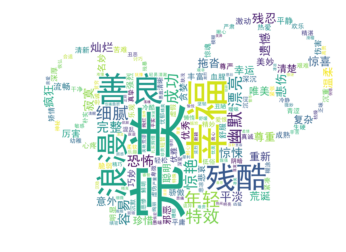

In [23]:
wc.generate_from_frequencies(dict(a_key_words))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [24]:
wc.to_file('./pic/douban250movieA.png')

In [25]:
# 副词
d_key_words = jieba.analyse.extract_tags(newtext, topK=200, withWeight=True, allowPOS=('d') )
df = pd.DataFrame(d_key_words, columns=['word','weight'])
df

,word,weight
0,永远,0.774413
1,真实,0.668526
2,深刻,0.491710
3,真正,0.459667
4,简直,0.329139
5,真相,0.308134
6,越越,0.272005
7,始终,0.237376
8,真心,0.210076
9,仿佛,0.157439


(-0.5, 2265.5, 1661.5, -0.5)

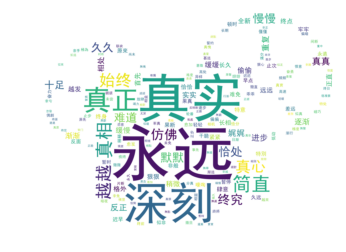

In [26]:
wc.generate_from_frequencies(dict(d_key_words))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [27]:
wc.to_file('./pic/douban250movieD.png')